In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\quiqu\AppData\Local\Temp\ipykernel_2128\1753261378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette=['skyblue', 'lightcoral'])


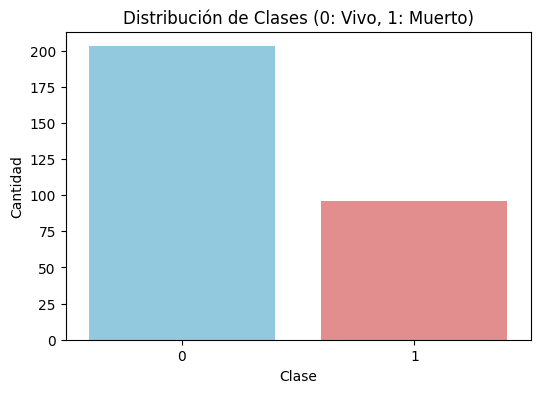

Matriz de Confusión con parámetros por defecto:
[[38  3]
 [ 7 12]]
Accuracy con parámetros por defecto: 0.8333333333333334
F1-Score con parámetros por defecto: 0.7058823529411765

Mejor accuracy alcanzado: 0.85 con parámetros: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


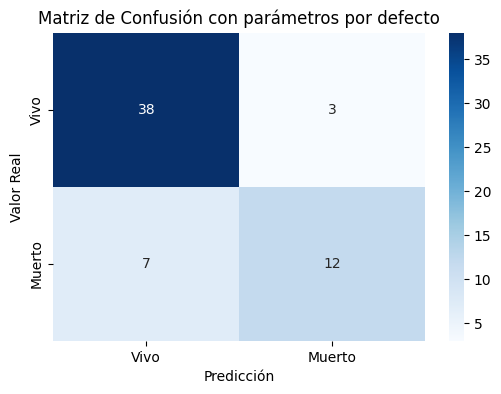

In [6]:
# Paso 1: Cargar el dataframe
df = pd.read_csv('heart_failure_dataset.csv')

# Paso 2: Graficar la distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases (0: Vivo, 1: Muerto)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Paso 3: Partición del dataset en conjunto de entrenamiento y test (estratificada)
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 4: Ajustar un Random Forest
def train_random_forest(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

# Entrenar el Random Forest con parámetros por defecto
rf_model, y_pred_default = train_random_forest()
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
accuracy_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print('Matriz de Confusión con parámetros por defecto:')
print(conf_matrix_default)
print(f'Accuracy con parámetros por defecto: {accuracy_default}')
print(f'F1-Score con parámetros por defecto: {f1_default}')

# Paso 5: Comparar accuracy y F1-Score (Investigado)
# El accuracy podría ser engañoso en casos de conjuntos de datos desbalanceados.
# F1-Score es útil cuando nos importa tanto la precisión como el recall.

# Paso 6: Prueba de ajustar los parámetros
best_accuracy = 0
best_model = None
best_params = None

for n_estimators in [50, 100, 150]:
    for max_depth in [None, 5, 10]:
        for min_samples_split in [2, 5, 10]:
            for min_samples_leaf in [1, 2, 4]:
                model, y_pred = train_random_forest(n_estimators, max_depth, min_samples_split, min_samples_leaf)
                accuracy = accuracy_score(y_test, y_pred)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print(f'\nMejor accuracy alcanzado: {best_accuracy} con parámetros: {best_params}')

# Visualizar la matriz de confusión con seaborn (pip install seaborn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', xticklabels=['Vivo', 'Muerto'], yticklabels=['Vivo', 'Muerto'])
plt.title('Matriz de Confusión con parámetros por defecto')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
